In [115]:
import pandas as pd
import numpy as np

pd.options.display.max_columns = 99


In [116]:
#Align columns

cols = ['symboling', 'normalized-losses', 'make', 'fuel-type', 'aspiration', 'num-of-doors', 'body-style', 
        'drive-wheels', 'engine-location', 'wheel-base', 'length', 'width', 'height', 'curb-weight', 'engine-type', 
        'num-of-cylinders', 'engine-size', 'fuel-system', 'bore', 'stroke', 'compression-rate', 'horsepower', 'peak-rpm', 'city-mpg', 'highway-mpg', 'price']

cars = pd.read_csv('import-85.csv',names=cols)

In [117]:
cars.head()

,symboling,normalized-losses,make,fuel-type,aspiration,num-of-doors,body-style,drive-wheels,engine-location,wheel-base,length,width,height,curb-weight,engine-type,num-of-cylinders,engine-size,fuel-system,bore,stroke,compression-rate,horsepower,peak-rpm,city-mpg,highway-mpg,price
0,3,?,alfa-romero,gas,std,two,convertible,rwd,front,88.6,168.8,64.1,48.8,2548,dohc,four,130,mpfi,3.47,2.68,9.0,111,5000,21,27,13495
1,3,?,alfa-romero,gas,std,two,convertible,rwd,front,88.6,168.8,64.1,48.8,2548,dohc,four,130,mpfi,3.47,2.68,9.0,111,5000,21,27,16500
2,1,?,alfa-romero,gas,std,two,hatchback,rwd,front,94.5,171.2,65.5,52.4,2823,ohcv,six,152,mpfi,2.68,3.47,9.0,154,5000,19,26,16500
3,2,164,audi,gas,std,four,sedan,fwd,front,99.8,176.6,66.2,54.3,2337,ohc,four,109,mpfi,3.19,3.4,10.0,102,5500,24,30,13950
4,2,164,audi,gas,std,four,sedan,4wd,front,99.4,176.6,66.4,54.3,2824,ohc,five,136,mpfi,3.19,3.4,8.0,115,5500,18,22,17450


In [118]:
# Select numeric values only 

numeric_cols = ['normalized-losses', 'wheel-base', 'length', 'width', 'height',
                          'curb-weight', 'bore', 'stroke', 'compression-rate', 'horsepower', 'peak-rpm', 
                          'city-mpg', 'highway-mpg', 'price']

numeric_cars= cars[numeric_cols]

In [119]:
# check that we only have numeric values
numeric_cars.head()

,normalized-losses,wheel-base,length,width,height,curb-weight,bore,stroke,compression-rate,horsepower,peak-rpm,city-mpg,highway-mpg,price
0,?,88.6,168.8,64.1,48.8,2548,3.47,2.68,9.0,111,5000,21,27,13495
1,?,88.6,168.8,64.1,48.8,2548,3.47,2.68,9.0,111,5000,21,27,16500
2,?,94.5,171.2,65.5,52.4,2823,2.68,3.47,9.0,154,5000,19,26,16500
3,164,99.8,176.6,66.2,54.3,2337,3.19,3.4,10.0,102,5500,24,30,13950
4,164,99.4,176.6,66.4,54.3,2824,3.19,3.4,8.0,115,5500,18,22,17450


In [120]:
# Replace ? in norm-losses column

numeric_cars= numeric_cars.replace('?',np.nan)

numeric_cars.head()


,normalized-losses,wheel-base,length,width,height,curb-weight,bore,stroke,compression-rate,horsepower,peak-rpm,city-mpg,highway-mpg,price
0,NaN,88.6,168.8,64.1,48.8,2548,3.47,2.68,9.0,111,5000,21,27,13495
1,NaN,88.6,168.8,64.1,48.8,2548,3.47,2.68,9.0,111,5000,21,27,16500
2,NaN,94.5,171.2,65.5,52.4,2823,2.68,3.47,9.0,154,5000,19,26,16500
3,164,99.8,176.6,66.2,54.3,2337,3.19,3.4,10.0,102,5500,24,30,13950
4,164,99.4,176.6,66.4,54.3,2824,3.19,3.4,8.0,115,5500,18,22,17450


In [121]:
# check for missing values in our data
numeric_cars=numeric_cars.astype('float')
numeric_cars.isnull().sum()

normalized-losses    41
wheel-base            0
length                0
width                 0
height                0
curb-weight           0
bore                  4
stroke                4
compression-rate      0
horsepower            2
peak-rpm              2
city-mpg              0
highway-mpg           0
price                 4
dtype: int64

In [122]:
# let's drop missing price rows
numeric_cars = numeric_cars.dropna(subset=['price'])
numeric_cars.head()
numeric_cars.isnull().sum()

normalized-losses    37
wheel-base            0
length                0
width                 0
height                0
curb-weight           0
bore                  4
stroke                4
compression-rate      0
horsepower            2
peak-rpm              2
city-mpg              0
highway-mpg           0
price                 0
dtype: int64

In [123]:
# replace other misisng vals in cols with mean
numeric_cars=numeric_cars.fillna(numeric_cars.mean())
numeric_cars.head()

,normalized-losses,wheel-base,length,width,height,curb-weight,bore,stroke,compression-rate,horsepower,peak-rpm,city-mpg,highway-mpg,price
0,122.0,88.6,168.8,64.1,48.8,2548.0,3.47,2.68,9.0,111.0,5000.0,21.0,27.0,13495.0
1,122.0,88.6,168.8,64.1,48.8,2548.0,3.47,2.68,9.0,111.0,5000.0,21.0,27.0,16500.0
2,122.0,94.5,171.2,65.5,52.4,2823.0,2.68,3.47,9.0,154.0,5000.0,19.0,26.0,16500.0
3,164.0,99.8,176.6,66.2,54.3,2337.0,3.19,3.40,10.0,102.0,5500.0,24.0,30.0,13950.0
4,164.0,99.4,176.6,66.4,54.3,2824.0,3.19,3.40,8.0,115.0,5500.0,18.0,22.0,17450.0


In [124]:
# check for nor no missing values
numeric_cars.isnull().sum()


normalized-losses    0
wheel-base           0
length               0
width                0
height               0
curb-weight          0
bore                 0
stroke               0
compression-rate     0
horsepower           0
peak-rpm             0
city-mpg             0
highway-mpg          0
price                0
dtype: int64

In [125]:
price_col=numeric_cars['price']
numeric_cars=(numeric_cars-numeric_cars.mean())/(numeric_cars.max()-numeric_cars.min())
numeric_cars['price'] = price_col


In [126]:
numeric_cars.head()

,normalized-losses,wheel-base,length,width,height,curb-weight,bore,stroke,compression-rate,horsepower,peak-rpm,city-mpg,highway-mpg,price
0,0.000000,-0.297289,-0.080612,-0.152911,-0.413889,-0.002974,0.099492,-0.274716,-0.072767,0.035528,-0.047995,-0.116086,-0.097015,13495.0
1,0.000000,-0.297289,-0.080612,-0.152911,-0.413889,-0.002974,0.099492,-0.274716,-0.072767,0.035528,-0.047995,-0.116086,-0.097015,16500.0
2,0.000000,-0.125277,-0.044791,-0.033253,-0.113889,0.103698,-0.464793,0.101474,-0.072767,0.236463,-0.047995,-0.171642,-0.123331,16500.0
3,0.219895,0.029242,0.035806,0.026577,0.044444,-0.084820,-0.100508,0.068141,-0.010267,-0.006528,0.156087,-0.032753,-0.018068,13950.0
4,0.219895,0.017580,0.035806,0.043671,0.044444,0.104086,-0.100508,0.068141,-0.135267,0.054220,0.156087,-0.199420,-0.228594,17450.0


In [127]:
from sklearn.neighbors import KNeighborsRegressor
from sklearn.metrics import mean_squared_error

def knn_train_test(train_col,target_col,df):
    knn = KNeighborsRegressor()
    np.random.seed(1)
    
    #shuffle data
    shuffled_index=np.random.permutation(df.index)
    rand_df = df.reindex(shuffled_index)
    
    #split data
    split= int(len(rand_df)/2)
    train_df = rand_df.iloc[0:split]
    test_df = rand_df.iloc[split:]
    
    # Fit knn
    knn.fit(train_df[[train_col]], train_df[target_col])
    #Predict
    predicted_labels=knn.predict(test_df[[train_col]])
    
    # MSE and RMSE
    mse=mean_squared_error(test_df[target_col],predicted_labels)
    rmse=np.sqrt(mse)
    return rmse

In [128]:
#Let's train model on each columns
train_cols=numeric_cars.columns.drop('price')
rmse_results={}

for col in train_cols:
    rmse_value=knn_train_test(col,'price',numeric_cars)
    rmse_results[col]=rmse_value
    
rmse_results_series=pd.Series(rmse_results)
rmse_results_series.sort_values()


horsepower           4010.414152
curb-weight          4401.118255
highway-mpg          4652.697833
width                4908.609914
city-mpg             4973.940485
length               5429.900973
wheel-base           5460.787788
compression-rate     6610.812153
bore                 6806.695830
normalized-losses    7304.373172
peak-rpm             7678.470979
height               7842.199226
stroke               8005.611387
dtype: float64

In [129]:
# Let's modify above function

def knn_train_test(train_col,target_col,df):
    
    np.random.seed(1)
    
    #shuffle data
    shuffled_index=np.random.permutation(df.index)
    rand_df = df.reindex(shuffled_index)
    
    #split data
    split= int(len(rand_df)/2)
    train_df = rand_df.iloc[0:split]
    test_df = rand_df.iloc[split:]
    
    k_vals=[1,3,5,7,9]
    k_rmse={}
    
    for k in k_vals: 
        knn = KNeighborsRegressor(n_neighbors=k)
        knn.fit(train_df[[train_col]], train_df[target_col])
        predicted_labels=knn.predict(test_df[[train_col]])
        
        mse=mean_squared_error(test_df[target_col],predicted_labels)
        rmse=np.sqrt(mse)
        k_rmse[k]=rmse
    return k_rmse


In [130]:
train_cols=numeric_cars.columns.drop('price')
k_rmse={}

for col in train_cols:
    rmse_value=knn_train_test(col,'price',numeric_cars)
    k_rmse[col]=rmse_value

In [131]:
k_rmse

{'bore': {1: 8602.5884845006603,
  3: 6984.2394894809158,
  5: 6806.6958300755823,
  7: 6939.1058456518022,
  9: 6915.2973750134106},
 'city-mpg': {1: 5863.1909434713079,
  3: 4672.77285307275,
  5: 4973.9404846610796,
  7: 5413.3908826775387,
  9: 5277.1766643494775},
 'compression-rate': {1: 8087.205346523092,
  3: 7375.0636855783587,
  5: 6610.8121531591287,
  7: 6732.8012829415147,
  9: 7024.4855254634349},
 'curb-weight': {1: 5288.0195725810245,
  3: 5022.3180117572329,
  5: 4401.1182547931239,
  7: 4330.6701276238755,
  9: 4633.4258799947584},
 'height': {1: 8942.0129519959519,
  3: 8378.2338527728607,
  5: 7842.199225717336,
  7: 7709.0699416548505,
  9: 7777.1734491607085},
 'highway-mpg': {1: 6022.8667247547837,
  3: 4671.3903897894661,
  5: 4652.6978325259934,
  7: 4817.2301043607267,
  9: 5261.877043557105},
 'horsepower': {1: 4170.0548480378011,
  3: 3985.1389178696736,
  5: 4010.4141521891734,
  7: 4351.2682711815723,
  9: 4514.5046414780554},
 'length': {1: 4611.990241761

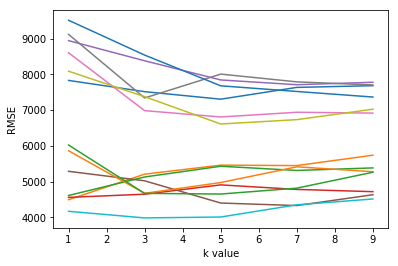

In [132]:
#Plot k_rmse
%matplotlib inline

for k,v in k_rmse.items():
    x = list(v.keys())
    y = list(v.values())
    
    plt.plot(x,y)
    plt.xlabel('k value')
    plt.ylabel('RMSE')
    

In [133]:
# Compute average RMSE across different `k` values for each feature.
feature_avg_rmse={}

for k,v in k_rmse.items():
    avg_rmse=np.mean(list(v.values()))
    feature_avg_rmse[k]=avg_rmse
avg_rmse_series=pd.Series(feature_avg_rmse)
avg_rmse_series.sort_values()
                  

horsepower           4206.276166
width                4723.406333
curb-weight          4735.110369
highway-mpg          5085.212419
length               5173.300277
city-mpg             5240.094366
wheel-base           5269.942030
compression-rate     7166.073599
bore                 7249.585405
normalized-losses    7592.985593
stroke               7990.349767
peak-rpm             8122.477154
height               8129.737884
dtype: float64

In [140]:
# clean up and make it like my code above

def knn_train_test(train_cols, target_col, df):
    np.random.seed(1)
    
    # Randomize order of rows in data frame.
    shuffled_index = np.random.permutation(df.index)
    rand_df = df.reindex(shuffled_index)

    # Divide number of rows in half and round.
    last_train_row = int(len(rand_df) / 2)
    
    # Select the first half and set as training set.
    # Select the second half and set as test set.
    train_df = rand_df.iloc[0:last_train_row]
    test_df = rand_df.iloc[last_train_row:]
    
    k_values = [5]
    k_rmses = {}
    
    for k in k_values:
        # Fit model using k nearest neighbors.
        knn = KNeighborsRegressor(n_neighbors=k)
        knn.fit(train_df[train_cols], train_df[target_col])

        # Make predictions using model.
        predicted_labels = knn.predict(test_df[train_cols])

        # Calculate and return RMSE.
        mse = mean_squared_error(test_df[target_col], predicted_labels)
        rmse = np.sqrt(mse)
        
        k_rmses[k] = rmse
    return k_rmses

k_rmse_results = {}

two_best_features = ['horsepower', 'width']
rmse_val = knn_train_test(two_best_features, 'price', numeric_cars)
k_rmse_results["two best features"] = rmse_val

three_best_features = ['horsepower', 'width', 'curb-weight']
rmse_val = knn_train_test(three_best_features, 'price', numeric_cars)
k_rmse_results["three best features"] = rmse_val

four_best_features = ['horsepower', 'width', 'curb-weight', 'city-mpg']
rmse_val = knn_train_test(four_best_features, 'price', numeric_cars)
k_rmse_results["four best features"] = rmse_val

five_best_features = ['horsepower', 'width', 'curb-weight' , 'city-mpg' , 'highway-mpg']
rmse_val = knn_train_test(five_best_features, 'price', numeric_cars)
k_rmse_results["five best features"] = rmse_val

six_best_features = ['horsepower', 'width', 'curb-weight' , 'city-mpg' , 'highway-mpg', 'length']
rmse_val = knn_train_test(six_best_features, 'price', numeric_cars)
k_rmse_results["six best features"] = rmse_val

k_rmse_results
    


{'five best features': {5: 3341.6024539726504},
 'four best features': {5: 3280.3807311630976},
 'six best features': {5: 3628.2611882141268},
 'three best features': {5: 3305.9401397969677},
 'two best features': {5: 3589.5762113967917}}

In [143]:
def knn_train_test(train_cols, target_col, df):
    np.random.seed(1)
    
    # Randomize order of rows in data frame.
    shuffled_index = np.random.permutation(df.index)
    rand_df = df.reindex(shuffled_index)

    # Divide number of rows in half and round.
    last_train_row = int(len(rand_df) / 2)
    
    # Select the first half and set as training set.
    # Select the second half and set as test set.
    train_df = rand_df.iloc[0:last_train_row]
    test_df = rand_df.iloc[last_train_row:]
    
    k_values = [i for i in range(1, 25)]
    k_rmses = {}
    
    for k in k_values:
        # Fit model using k nearest neighbors.
        knn = KNeighborsRegressor(n_neighbors=k)
        knn.fit(train_df[train_cols], train_df[target_col])

        # Make predictions using model.
        predicted_labels = knn.predict(test_df[train_cols])

        # Calculate and return RMSE.
        mse = mean_squared_error(test_df[target_col], predicted_labels)
        rmse = np.sqrt(mse)
        
        k_rmses[k] = rmse
    return k_rmses

k_rmse_results = {}

three_best_features = ['horsepower', 'width', 'curb-weight']
rmse_val = knn_train_test(three_best_features, 'price', numeric_cars)
k_rmse_results["three best features"] = rmse_val

four_best_features = ['horsepower', 'width', 'curb-weight', 'city-mpg']
rmse_val = knn_train_test(four_best_features, 'price', numeric_cars)
k_rmse_results["four best features"] = rmse_val

five_best_features = ['horsepower', 'width', 'curb-weight' , 'city-mpg' , 'highway-mpg']
rmse_val = knn_train_test(five_best_features, 'price', numeric_cars)
k_rmse_results["five best features"] = rmse_val

k_rmse_results

{'five best features': {1: 2530.0554077602005,
  2: 2897.1757974767684,
  3: 3183.4597426217424,
  4: 3168.0230415758415,
  5: 3341.6024539726504,
  6: 3537.5205429981911,
  7: 3817.3718358946267,
  8: 4004.4145296855731,
  9: 3992.3186041830318,
  10: 4138.7287878533352,
  11: 4342.0528528290979,
  12: 4416.1453810311359,
  13: 4493.8798141857205,
  14: 4463.5016015545707,
  15: 4474.480783207805,
  16: 4553.5595362768345,
  17: 4597.001081375769,
  18: 4655.283442648355,
  19: 4687.9008939828218,
  20: 4712.0229855431653,
  21: 4755.8566258237734,
  22: 4788.162720030673,
  23: 4806.9233819650544,
  24: 4879.983352195467},
 'four best features': {1: 2516.5892799502258,
  2: 2811.1727257604443,
  3: 3013.3615157930335,
  4: 3126.2694826412612,
  5: 3280.3807311630976,
  6: 3479.5099401018138,
  7: 3781.5612742414464,
  8: 3988.8669577450623,
  9: 4024.9986213622451,
  10: 4042.2472261878988,
  11: 4230.3352486840677,
  12: 4354.0086751540612,
  13: 4461.6266648777882,
  14: 4468.02984

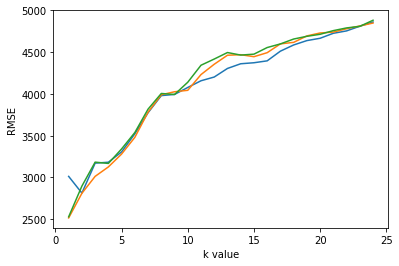

In [144]:
for k,v in k_rmse_results.items():
    x = list(v.keys())
    y = list(v.values())
    
    plt.plot(x,y)
    plt.xlabel('k value')
    plt.ylabel('RMSE')